In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from PIL import Image

In [34]:
path_london = 'dataset/london_crime_by_lsoa.csv'

In [35]:
df_london = pd.read_csv(path_london)

In [36]:
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [37]:
print(df_london.head())

   lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6  


In [38]:
print(df_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB
None


In [39]:
print(df_london.describe())

              value          year         month
count  1.349060e+07  1.349060e+07  1.349060e+07
mean   4.779444e-01  2.012000e+03  6.500000e+00
std    1.771513e+00  2.581989e+00  3.452053e+00
min    0.000000e+00  2.008000e+03  1.000000e+00
25%    0.000000e+00  2.010000e+03  3.750000e+00
50%    0.000000e+00  2.012000e+03  6.500000e+00
75%    1.000000e+00  2.014000e+03  9.250000e+00
max    3.090000e+02  2.016000e+03  1.200000e+01


In [40]:
# Check for missing values
print(df_london.isnull().sum())

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


In [41]:
# Mengubah kolom 'year' dan 'month' menjadi datetime format
df_london['year'] = pd.to_datetime(df_london['year'], format='%Y')
df_london['month'] = pd.to_datetime(df_london['month'], format='%m')

Hipotesis:
1. Apakah ada wilayah yang secara konsisten memiliki tingkat kejahatan yang lebih tinggi dibandingkan yang lain?

## Visualisasi Data

Bar chart untuk hipotesis: Apakah ada wilayah yang secara konsisten memiliki tingkat kejahatan yang lebih tinggi dibandingkan yang lain?

In [42]:
# Mengelompokkan data berdasarkan borough dan menghitung rata-rata jumlah kejahatan
mean_crimes_by_borough = df_london.groupby('borough')['value'].mean()

# Melakukan uji statistik (contoh: ANOVA) untuk membandingkan rata-rata
# Pada contoh ini, saya akan menggunakan uji ANOVA satu arah
f_stat, p_value = stats.f_oneway(*[group['value'] for name, group in df_london.groupby('borough')])

# Mencetak hasil
print(f'Statistik F: {f_stat:.2f}')
print(f'Nilai p: {p_value:.4f}')

# Menginterpretasikan hasil
if p_value < 0.05:
    print("Nilai p kurang dari 0.05, menunjukkan bahwa terdapat perbedaan signifikan dalam tingkat kejahatan di antara borough.")
else:
    print("Nilai p lebih besar dari 0.05, menunjukkan bahwa tidak ada perbedaan signifikan dalam tingkat kejahatan di antara borough.")


Statistik F: 3538.80
Nilai p: 0.0000
Nilai p kurang dari 0.05, menunjukkan bahwa terdapat perbedaan signifikan dalam tingkat kejahatan di antara borough.


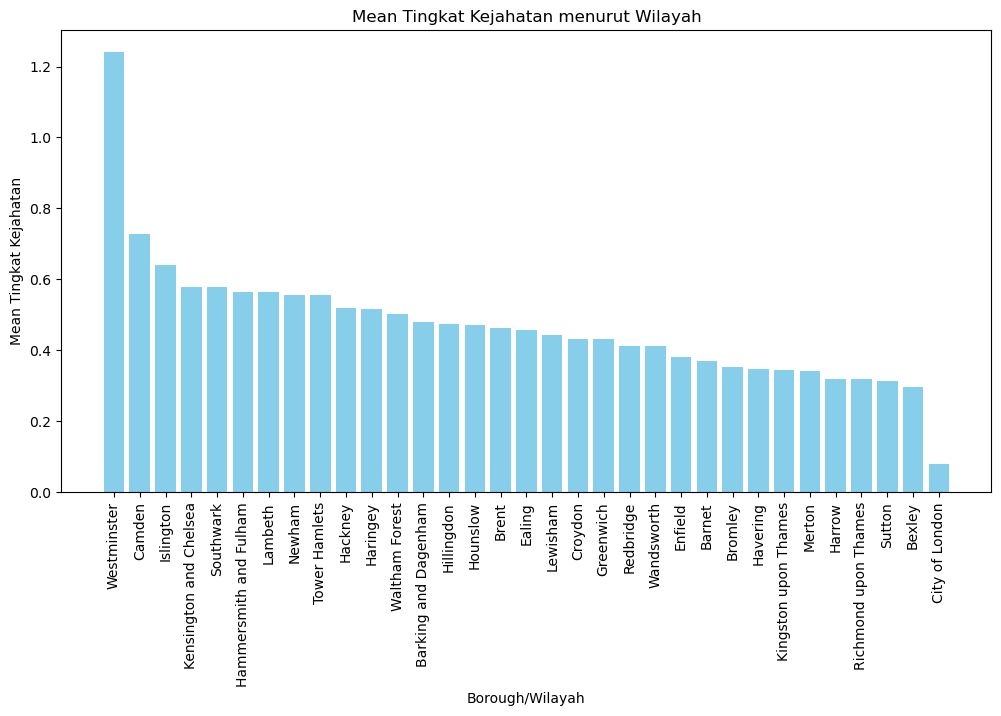

In [43]:
# Mengurutkan wilayah berdasarkan mean tingkat kejahatan
mean_crimes_by_borough = mean_crimes_by_borough.sort_values(ascending=False)

# Mengolah bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_crimes_by_borough.index, mean_crimes_by_borough.values, color='skyblue')
plt.xlabel('Borough/Wilayah')
plt.ylabel('Mean Tingkat Kejahatan')
plt.title('Mean Tingkat Kejahatan menurut Wilayah')
plt.xticks(rotation=90)
plt.show()

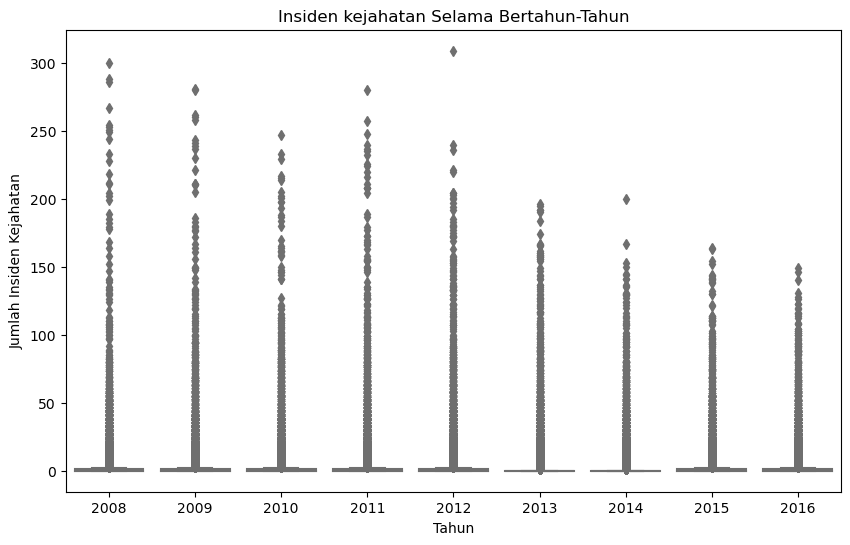

In [50]:
# Box plot untuk insiden kejahatan berdasarkan tahun
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_london['year'].dt.year, y=df_london['value'], palette='pastel')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Insiden Kejahatan')
plt.title('Insiden kejahatan Selama Bertahun-Tahun')
plt.show()

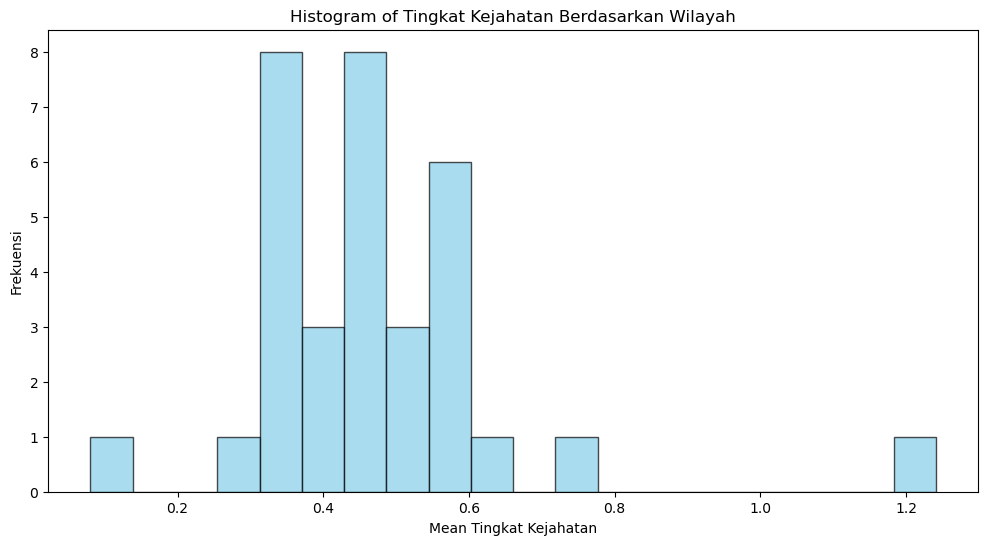

In [51]:
# Histogram tingkat kejahatan berdasarkan wilayah
plt.figure(figsize=(12, 6))
plt.hist(mean_crimes_by_borough.values, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Mean Tingkat Kejahatan')
plt.ylabel('Frekuensi')
plt.title('Histogram of Tingkat Kejahatan Berdasarkan Wilayah')
plt.show()

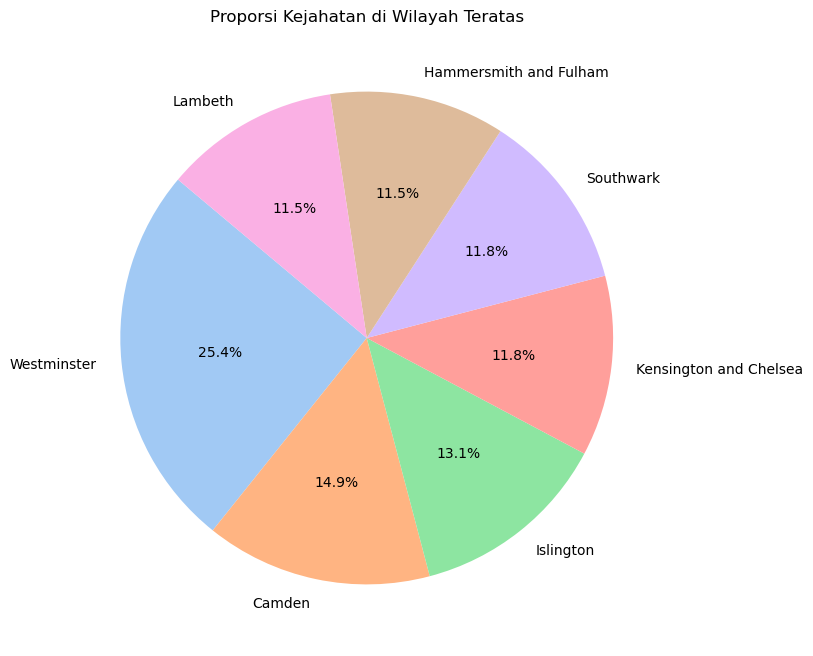

In [52]:
# Pie chart untuk proporsi kejahatan di wilayah teratas
top_boroughs = mean_crimes_by_borough.head(7)  # Sesuaikan jumlah wilayah teratas yang diperlukan untuk ditampilkan
plt.figure(figsize=(8, 8))
plt.pie(top_boroughs.values, labels=top_boroughs.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proporsi Kejahatan di Wilayah Teratas')
plt.show()

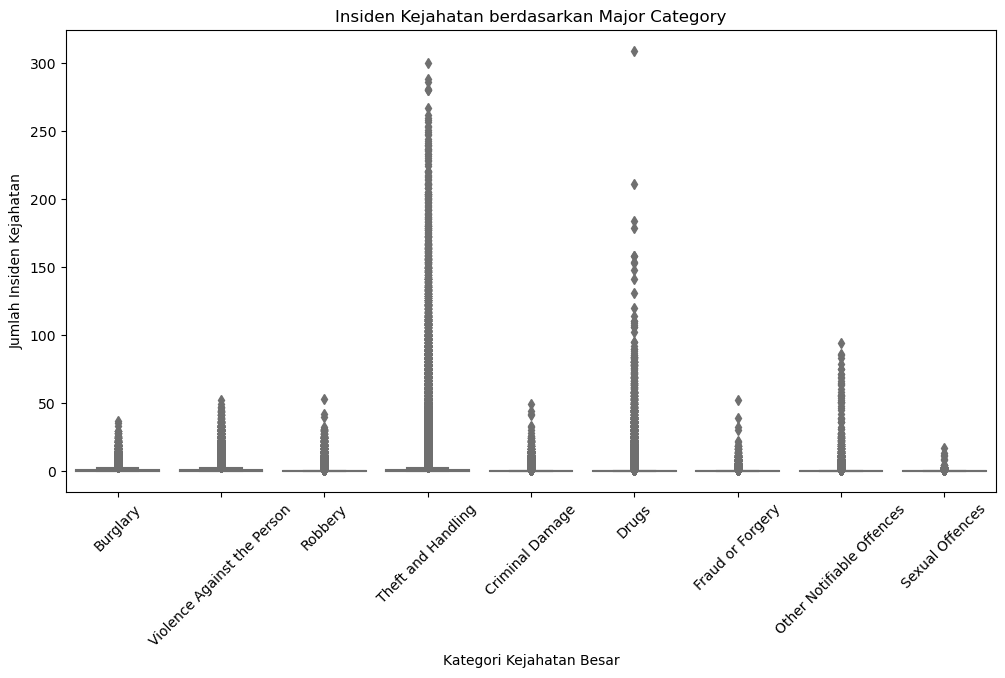

In [54]:
# Box plot untuk insiden kejahatan berdasarkan major category
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_london['major_category'], y=df_london['value'], palette='pastel')
plt.xlabel('Kategori Kejahatan Besar')
plt.ylabel('Jumlah Insiden Kejahatan')
plt.title('Insiden Kejahatan berdasarkan Major Category')
plt.xticks(rotation=45)
plt.show()


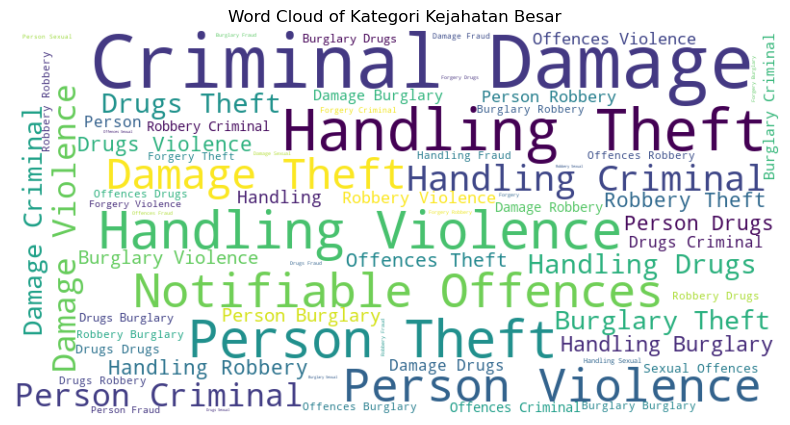

In [56]:
from wordcloud import WordCloud

text = ' '.join(df_london['major_category'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Kategori Kejahatan Besar')
plt.show()
